# Problem Statement

The most common cause for deaths worldwide is because of heart diseases such as heart attack, heart failure, and arrhythmia. Cardiac arrhythmia is a type of heart disease that causes sudden cardiac arrest due to a change in heart rhythm. In the US alone, cardiac arrhythmia caused about 325,000 deaths every year among adults (Beckerman, 2020). Some of the cardiac arrhythmia cases can be dangerous, while some are less risky.Machine learning models can detect cardiac arrhythmia in the early stages, which improves early diagnosis and treatment. For this to work, machine learning models need the information from electrocardiogram (ECG) that shows individual’s heart rhythm. Machine learning approaches will not only predict patients that have arrhythmia, but it also helps to identify patients with high risk Atrial Fibrillation attacks.This Atrial Fibrillation can be classified as a risky type. There are normal types of arrhythmias known as premature heartbeats, which sometimes do not require treatments for healthy people. Therefore, it is important to have a machine learning models to classify normal and risky types of arrhythmias, as the treatments are different.

# Objective

The goal is to get dataset of patients with different classes of arrhythmia and classify them into normal and risky type using predictive models. 

# Data Acquisition

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("data_arrhythmia.csv",sep=';')
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [4]:
df.shape

(452, 280)

The dataset is obtained from kaggle at https://www.kaggle.com/code/batuhaneralpofficial/arrythmia-detection-from-ecg-data/data 
There are 452 rows and 280 columns in the dataset. There are total of 279 attributes and 1 output which is the target variable.
From the 279 attributes, 206 are linear and 73 are nominal. The output is categorical data.There are total of 16 types in the 
target variable which also known as 16 classes of cardiac arrhythmia.

Data description
1. Age (in years) : Linear
2. Sex (0:male, 1: female): Nominal
3. Height (in centimeters): Linear
4. Weight (in kilograms): Linear
5. QRS duration (in miliseconds): Linear
6. P-R interval (in miliseconds): Linear
7. Q-T interval (in miliseconds): Linear
8. T interval (in miliseconds): Linear
9. P interval (in miliseconds): Linear
10. Vector angles (QRS,T,P,QRST,J): Linear
11. Heart Rate (no of heartbeats per minute): Linear
12. Average width of wave - 60 attributes (in miliseconds): Linear
13. Number of intrinsic deflections: Linear
14. Existence of ragged wave- 36 attributes: Nominal
15. Existence of diphasic derivation-36 attributes: Nominal
16. Amplitude of wave-96 attributes(multiply 0.1 milivolt): Linear
17. Areas of all segments divided by 10 - 12 attributes(Area=width*height/2): Linear
18. QRSTA- 12 attributes: Linear 

Classes of arrhythmia in the dataset
1. Normal
2. Ischemic changes (Coronary Artery Disease
3. Old Anterior Myocardial Infarction
4. Old Inferior Myocardial Infarction
5. Sinus tachycardy
6. Sinus bradycardy
7. Ventricular Premature Contraction (PVC)
8. Supraventricular Premature Contraction
9. Left bundle branch block
10. Right bundle branch block
11. degree AtrioVentricular block
12. degree AV block
13. degree AV block
14. Left ventricule hypertrophy
15. Atrial Fibrillation or Flutter
16. Others

In [5]:
#Checking the distribution of target variable
df.diagnosis.value_counts()

1     245
10     50
2      44
6      25
16     22
3      15
4      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: diagnosis, dtype: int64

From the distributions above, there are total of 245 normal type of arrhythmia and 207 risky classes of arrhythmia. In this experiment, we will predict patients with risky class of arrhythmia and classify them into classes 2-16. The positive case will be 'risky patients' while negative case is 'normal patients'.

# Data Pre-Processing

**Identifying missing data**

The presence of question marks within the field indicates missing data, and to properly identify and address these gaps, it is necessary to replace them with null values

In [7]:
df.replace('?', np.nan, inplace=True)
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [13]:
data_missing= df.isnull()

In [15]:
for i in data_missing.columns.values.tolist():
    print (i)
    print (data_missing[i].value_counts())
    print ('')

age
False    452
Name: age, dtype: int64

sex
False    452
Name: sex, dtype: int64

height
False    452
Name: height, dtype: int64

weight
False    452
Name: weight, dtype: int64

qrs_duration
False    452
Name: qrs_duration, dtype: int64

p-r_interval
False    452
Name: p-r_interval, dtype: int64

q-t_interval
False    452
Name: q-t_interval, dtype: int64

t_interval
False    452
Name: t_interval, dtype: int64

p_interval
False    452
Name: p_interval, dtype: int64

qrs
False    452
Name: qrs, dtype: int64

T
False    444
True       8
Name: T, dtype: int64

P
False    430
True      22
Name: P, dtype: int64

QRST
False    451
True       1
Name: QRST, dtype: int64

J
True     376
False     76
Name: J, dtype: int64

heart_rate
False    451
True       1
Name: heart_rate, dtype: int64

q_wave
False    452
Name: q_wave, dtype: int64

r_wave
False    452
Name: r_wave, dtype: int64

s_wave
False    452
Name: s_wave, dtype: int64

R'_wave
False    452
Name: R'_wave, dtype: int64

S'_wave
False

The columns with missing values and number of missing values:
1. T - 8
2. P - 22
3. QRST - 1
4. J - 376
5. heart_rate - 1

In [24]:
df.isnull().sum().sum()

408

There are total of 408 missing values in the dataset

Replacing the missing values with mean because it is sensitive to outliers, which are extreme values that can skew the average. Therefore, if there are outliers in the data, replacing missing values with the mean could introduce bias.

The columns with missing values are replaced with mean as below

In [27]:
mean_T = df['T'].astype(float).mean(axis=0)
df['T'].replace(np.nan,mean_T,inplace=True)
print(mean_T)

mean_P = df['P'].astype(float).mean(axis=0)
df['P'].replace(np.nan, mean_P, inplace=True)
print(mean_P)

mean_QRST = df['QRST'].astype(float).mean(axis=0)
df['QRST'].replace(np.nan, mean_QRST, inplace=True)
print(mean_QRST)

mean_J = df['J'].astype(float).mean(axis=0)
df['J'].replace(np.nan, mean_J, inplace=True)
print(mean_J)

mean_heart = df['heart_rate'].astype(float).mean(axis=0)
df['heart_rate'].replace(np.nan, mean_heart, inplace=True)
print(mean_heart)

36.15090090090089
48.913953488372094
36.71618625277162
-13.592105263157896
74.46341463414635


In [28]:
#Checking again for missing values
df.isnull().sum().sum()

0

In [6]:
#Checking for duplicates
df.duplicated().sum()

0

There are no duplicates in the dataset

**Data Formating**

Checking the datatypes of the columns

In [29]:
print(df.dtypes)

age               int64
sex               int64
height            int64
weight            int64
qrs_duration      int64
                 ...   
LD              float64
LE              float64
LF              float64
LG              float64
diagnosis         int64
Length: 280, dtype: object


All the datatypes are in the right format.

In [30]:
df.describe()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


The above descriptions show that 'LC' attribute has no values which means all is 0 and this feature might not be important for the models. They might be other unimportant features like this.These features need to be removed. Besides that, 'height' has a max value of 780cm which seems weird.So,all the instances with height 780cm will be called to check the data

Data pre-processing will be done on the unimportant features and the height. The steps are as follow:
1. Get the data of irrelevent heights
2. Change the heights
3. Get unimportant features
4. Remove the features

In [31]:
df[df['height']==780]

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
141,1,1,780,6,85,165,237,150,106,88,...,0.0,5.0,-4.6,0.0,0,1.3,0.7,2.7,5.5,5


From the data above, it shows that 1 year old baby's height is 780 which is irrelevant. There must have been a typo in the data.
To check for other heights, the number of occurences for each height will need to be shown to see any irrelevent heights.

In [32]:
df['height'].value_counts().sort_index()

105     1
110     1
119     1
120     2
124     1
127     1
130     2
132     1
133     1
138     1
140     1
146     1
148     1
149     1
150     9
152     1
153     5
154     4
155    23
156    19
157    10
158     9
159     6
160    81
161     5
162    15
163    16
164     9
165    46
166     9
167     8
168    15
169     7
170    40
171     9
172    14
173     7
174     4
175    21
176    10
177     4
178     9
179     1
180     4
181     1
182     2
184     1
185     3
186     3
188     1
190     3
608     1
780     1
Name: height, dtype: int64

It is seen that there are 2 irrelevant heights. Just now 780 was found and there is another one which is 608.The data for height 608cm will be called and edited to correct height

In [33]:
df[df['height']==608]

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
316,0,0,608,10,83,126,232,128,60,125,...,-0.7,4.5,-5.5,0.0,0,0.5,2.5,-11.8,1.7,5


It shows that the one with height 608cm is a baby too. So, this needs to be changed.

In [34]:
#Changing the value of heights for 170 cm and 608cm
df.loc[df["height"] == 780, "height"] = 78
df.loc[df["height"] == 608, "height"] = 61

In [35]:
#Checking if the height has changed
df[df['height']==61]

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
316,0,0,61,10,83,126,232,128,60,125,...,-0.7,4.5,-5.5,0.0,0,0.5,2.5,-11.8,1.7,5


Searching for features with single values 

In [36]:
oneLevel = [] #create an empty list to append features with one level

ncol = df.shape[1] # store number of columns

#for loop to add features names with one level to "one_levels" list 
for index in range(ncol):
    if len(df.iloc[:,index].unique()) == 1:
        oneLevel.append(df.columns[index])

oneLevel

["S'_wave",
 'CB',
 'CD',
 'CS',
 'EV',
 'EY',
 'FF',
 'FH',
 'FJ',
 'FL',
 'FS',
 'FZ',
 'GA',
 'GH',
 'IB',
 'KP',
 'LC']

Dropping features with only one level can be a useful approach to reduce the complexity of a dataset and improve the performance of the machine learning algorithms. Features with only one level do not provide any variability in the data, and therefore cannot contribute to the predictive power of the model. By dropping such features, we can reduce the dimensionality of the data and focus on the variables that are more informative.

In [37]:
#Dropping one_level columns
df1 = df.copy()
df1 = df.drop(columns=oneLevel) # delete one_level columns 

In [38]:
#17 columns dropped
df1.shape

(452, 263)

**Data Normalization**

Data normalization is typically done when the range of values in different variables (or features) of a dataset varies significantly. Normalizing the data ensures that each feature has a similar scale, which can help machine learning algorithms to converge faster and perform better.

In [39]:
df1.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,-0.1,3.9,25.4,62.8,7


Based on the dataset, data normalization is not necessary for this dataset as the features such as age,height and weight are in the same range with the target variable. Besides that, all the features are measured in same scale which are in float and integer.

Classifying the numbers into two classes which are Normal and Risky

In [40]:
df_=df1.copy()
df_.loc[df_["diagnosis"] == 1,"diagnosis"] = "Normal"         #class 1 is normal arrythmia
df_.loc[df_["diagnosis"] != "Normal","diagnosis"] = "Risky"    #other classes are risky classes

In [41]:
df1.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,-0.1,3.9,25.4,62.8,7


In [42]:
df_.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.9,2.9,23.3,49.4,Risky
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8,Risky
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.3,3.4,12.3,49.0,Risky
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.4,2.6,34.6,61.6,Normal
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,-0.1,3.9,25.4,62.8,Risky


In [43]:
df2=df1.copy()
df2["diagnosis-type"]=df_["diagnosis"]

In [44]:
df2.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LD,LE,LF,LG,diagnosis,diagnosis-type
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.9,2.9,23.3,49.4,8,Risky
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8,6,Risky
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.3,3.4,12.3,49.0,10,Risky
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.4,2.6,34.6,61.6,1,Normal
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,-0.1,3.9,25.4,62.8,7,Risky


The "diagnosis-type" column in the new dataset is categorical, which means that it contains non-numerical values. To make it compatible with a predictive model, it is necessary to convert these categorical values into numerical ones. By doing so, the model will be able to analyze and learn from the data more effectively​.

In [45]:
df3=df2.copy()
df3["diagnosis-type"].replace({"Normal":0,"Risky":1},inplace=True)
df3.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LD,LE,LF,LG,diagnosis,diagnosis-type
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.9,2.9,23.3,49.4,8,1
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8,6,1
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.3,3.4,12.3,49.0,10,1
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.4,2.6,34.6,61.6,1,0
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,-0.1,3.9,25.4,62.8,7,1


In [46]:
df2["target"]=df3["diagnosis-type"]
df2.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KZ,LA,LB,LD,LE,LF,LG,diagnosis,diagnosis-type,target
0,75,0,190,80,91,193,371,174,121,-16,...,9.0,-0.9,0.0,0.9,2.9,23.3,49.4,8,Risky,1
1,56,1,165,64,81,174,401,149,39,25,...,8.5,0.0,0.0,0.2,2.1,20.4,38.8,6,Risky,1
2,54,0,172,95,138,163,386,185,102,96,...,9.5,-2.4,0.0,0.3,3.4,12.3,49.0,10,Risky,1
3,55,0,175,94,100,202,380,179,143,28,...,12.2,-2.2,0.0,0.4,2.6,34.6,61.6,1,Normal,0
4,75,0,190,80,88,181,360,177,103,-16,...,13.1,-3.6,0.0,-0.1,3.9,25.4,62.8,7,Risky,1


A new target column added to the dataset for the diagnosis-type feature.1 shows Risky while 0 is for Normal

# Exploratory Data Analysis

**Descriptive statistic**

Summarize categorical column

Getting number of occurences for each class

In [47]:
diagnosis_value_counts=df2["diagnosis"].value_counts().to_frame()
diagnosis_value_counts.rename(columns={'diagnosis':'count_class'},inplace=True)
diagnosis_value_counts

,count_class
1,245
10,50
2,44
6,25
16,22
3,15
4,15
5,13
9,9
15,5


In [48]:
target_value_counts=df2["target"].value_counts().to_frame()
target_value_counts.rename(columns={'target':'count_target'},inplace=True)
target_value_counts

,count_target
0,245
1,207


The dataset contains a total of 245 observations belonging to the normal class and 207 observations belonging to the risky class. When the model is later deployed, it will use this information to predict whether new observations belong to the "Normal" or "Risky" class​.

In [49]:
gender_value_counts=df2["sex"].value_counts().to_frame()
gender_value_counts.rename(columns={'sex':'count_gender'},inplace=True)
gender_value_counts

,count_gender
1,249
0,203


There are 249 females and 203 males in the dataset.

Creating boxplot

<AxesSubplot:xlabel='sex', ylabel='diagnosis'>

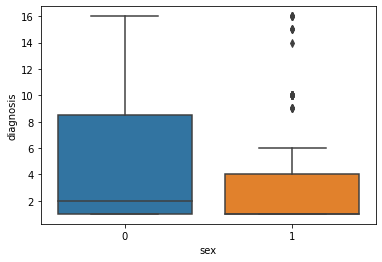

In [50]:
sns.boxplot(x="sex",y="diagnosis",data=df2)

The boxplot displays a wider Interquartile range (IQR) for the male category (coded as 0), and a narrower IQR for the female category. This indicates that there is a greater variability in the distribution of the male data points, whereas the female data points are more tightly clustered around the median. Tighter cluster of data points around the median suggests that there is less variability in the distribution, which may make the data easier to model and analyze.

Text(0, 0.5, 'No. of Classes')

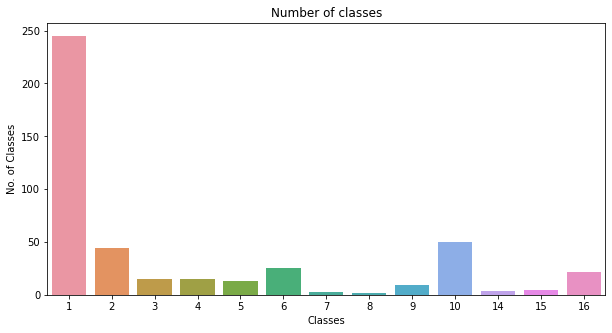

In [51]:
plt.figure(figsize=(10, 5))
sns.countplot(df2['diagnosis'])
plt.title('Number of classes')
plt.xlabel('Classes')
plt.ylabel('No. of Classes')

Based on the above graph, it can be observed that the dataset contains a significantly higher number of normal cases of arrhythmia compared to other classes. The second highest class is Class 10, followed by Class 2 and Class 16. The lowest values are from classes 7,8,14 and 15.

In [53]:
df2_=df2[['diagnosis','age','sex']]
df2_grp=df2_.groupby(['diagnosis','sex'],as_index=False).mean()
df2_grp

,diagnosis,sex,age
0,1,0,47.070588
1,1,1,45.850000
2,2,0,49.944444
3,2,1,53.000000
4,3,0,53.333333
5,4,0,57.000000
6,4,1,58.000000
7,5,0,13.000000
8,5,1,38.777778
9,6,0,50.714286


The description above shows average age of people for each class and gender. For class 1,2,4,6,10,15,16 are middle-aged individuals aged 31 to 59, class 3,7,8 showing for male only and average age is 53 to 70. Class 9 is showing average age of 45 to 68. Class 5 has tenagers from age 13 to 39 age while class 14 are young adults from age 18 to 22.

Text(0, 0.5, 'class')

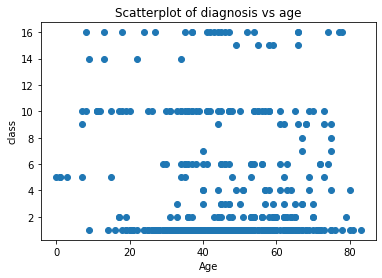

In [54]:
y=df2["diagnosis"]
x=df2["age"]
plt.scatter(x,y)

plt.title("Scatterplot of diagnosis vs age")
plt.xlabel("Age")
plt.ylabel("class")

The scatter plot shows more distributions for class 1-2 from the age of 20 to 75. The babies at age 0 are mostly in arrhythmia class of 4 to 6 which falls under Risky class. 

**Feature Selection**

Feature selection using p-value and backward elimination

Features are selected by first counting p-values of each attribute. Those with p-values more than 0.05 are removed using backward elimination method. 

In [55]:
df4=df2.select_dtypes(exclude = 'object')
X = df4.drop("target",1) #Feature Matrix
y = df4["target"]

In [56]:
import statsmodels.api as sm
X1 = sm.add_constant(X)
#Fitting sm.OLS model
model_sm = sm.OLS(y,X1.astype(float)).fit()
model_sm.pvalues

const        3.440459e-01
age          3.315459e-01
sex          2.213431e-01
height       4.956541e-01
weight       3.595492e-02
                 ...     
LD           3.206945e-01
LE           6.945304e-01
LF           1.919244e-01
LG           6.467439e-01
diagnosis    2.289889e-31
Length: 259, dtype: float64

Backward elimination used to eliminate features with p value more than 0.05

In [57]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
 p= []
 X1 = X[cols]
 X1 = sm.add_constant(X1)
 model_sm = sm.OLS(y,X1).fit()
 p = pd.Series(model_sm.pvalues.values[1:],index = cols)
 pmax = max(p)
 feature_with_p_max = p.idxmax()
 if(pmax>0.05):
  cols.remove(feature_with_p_max)
 else:
  break
features = cols
print(features)

['sex', 'weight', 'p-r_interval', 'q-t_interval', 'p_interval', 'r_wave', 'AB', 'AE', 'AK', 'AN', 'BF', 'BH', 'BP', 'BR', 'BS', 'CG', 'CH', 'CN', 'DA', 'DK', 'DP', 'DY', 'EC', 'ED', 'EL', 'ET', 'FK', 'FO', 'FT', 'GD', 'GE', 'GF', 'GJ', 'GL', 'GP', 'GR', 'HB', 'HH', 'HJ', 'HR', 'HS', 'HT', 'HU', 'IG', 'IH', 'IL', 'JA', 'JC', 'JO', 'JP', 'JS', 'JT', 'KA', 'KD', 'KE', 'KG', 'KZ', 'LD', 'LF', 'diagnosis']


After backward elimination, 60 features are selected for the predictive model. 

In [58]:
new_df=df4[['sex', 'weight', 'p-r_interval', 'q-t_interval', 'p_interval', 'r_wave', 'AB', 'AE', 'AK', 'AN', 'BF', 'BH', 'BP', 'BR', 'BS', 'CG', 'CH', 'CN', 'DA', 'DK', 'DP', 'DY', 'EC', 'ED', 'EL', 'ET', 'FK', 'FO', 'FT', 'GD', 'GE', 'GF', 'GJ', 'GL', 'GP', 'GR', 'HB', 'HH', 'HJ', 'HR', 'HS', 'HT', 'HU', 'IG', 'IH', 'IL', 'JA', 'JC', 'JO', 'JP', 'JS', 'JT', 'KA', 'KD', 'KE', 'KG', 'KZ', 'LD', 'LF', 'diagnosis']].copy()

In [59]:
new_df.head()

,sex,weight,p-r_interval,q-t_interval,p_interval,r_wave,AB,AE,AK,AN,...,JS,JT,KA,KD,KE,KG,KZ,LD,LF,diagnosis
0,0,80,193,371,121,52,0,0,36,0,...,0.0,0.0,-0.3,-8.4,0.0,0.9,9.0,0.9,23.3,8
1,1,64,174,401,39,48,0,0,0,0,...,0.0,0.0,-0.2,-5.0,0.0,0.5,8.5,0.2,20.4,6
2,0,95,163,386,102,40,0,0,0,0,...,4.0,-0.5,0.7,-5.7,0.0,0.5,9.5,0.3,12.3,10
3,0,94,202,380,143,72,0,0,0,0,...,0.0,0.0,0.4,-5.5,0.0,0.1,12.2,0.4,34.6,1
4,0,80,181,360,103,48,0,0,0,0,...,0.0,0.0,-0.2,-7.8,0.0,-0.1,13.1,-0.1,25.4,7


In [60]:
new_df.shape

(452, 60)

60 features are selected for the predictive model

# Model Development

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from sklearn.metrics import plot_precision_recall_curve

All the packages for the models, performance metrics, splitting, confusion matrix and precision-recall curve are imported. The dataset with important features saved in variable X and variable y has the target variable. The dataset split into train and test with a train size of 0.75 with a test size of 0.25. Then, MinMaxScaler() used to scale the train and test dataset to make sure they are within the range. 
Next, Logistic Regression and Random Forest model are created as shown below. The predictive models are later evaluated using performance metrics such as accuracy, precision, recall, sensitivity and specificity. Confusion matrix plotted to get the number of correct predictions made by the model. Precison-Recall curve also plotted to

Predict Normal or Risky

In [62]:
X=new_df
y=df4["target"]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 

In [64]:
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(X_train)
Xtest_scaled = scaler.transform(X_test)
Xtrain = Xtrain_scaled
Xtest = Xtest_scaled

Creating predictive models

In [65]:
lr_model = LogisticRegression(random_state=0,solver = "saga")
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='saga')

In [66]:
rfc_model = RandomForestClassifier(max_depth=9, random_state=0,n_estimators = 100)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, random_state=0)

In [67]:
lr_ypred=lr_model.predict(X_test)

In [68]:
rfc_ypred=rfc_model.predict(X_test)

Confusion matrix used to see number of correct and wrong predictions

<AxesSubplot:>

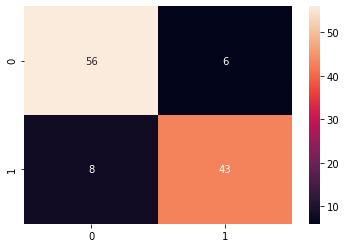

In [69]:
lr_cm=confusion_matrix(y_test,lr_ypred)
sns.heatmap(lr_cm, annot=True)

In [70]:
lr_confusion = pd.DataFrame(lr_cm, index=['Normal','Risky'],
columns=['predicted 0','predicted 1'])
lr_confusion

,predicted 0,predicted 1
Normal,56,6
Risky,8,43


The Logistic Regression model predicted 56 correct predictions for Normal and 6 wrong predictions while it predicted 43 correct predictions for Risky and 8 wrong predictions

<AxesSubplot:>

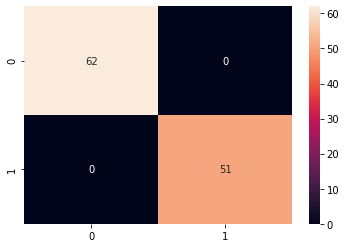

In [71]:
rfc_cm=confusion_matrix(y_test,rfc_ypred)
sns.heatmap(rfc_cm, annot=True)

In [72]:
rfc_confusion = pd.DataFrame(rfc_cm, index=['Normal','Risky'],
columns=['predicted 0','predicted 1'])
rfc_confusion

,predicted 0,predicted 1
Normal,62,0
Risky,0,51


Random forest model predicted correctly for both "Normal" and "Risky" class of arrhythmia

# Model Evaluation

In [73]:
rfc_score=accuracy_score(y_test,rfc_ypred)
print("Accuracy: ", rfc_score)

Accuracy:  1.0


In [74]:
lr_score=accuracy_score(y_test,lr_ypred)
print("Accuracy: ", lr_score)

Accuracy:  0.8761061946902655


It shows that Random Forest has an accuracy of 1.0 while Logistic Regression has the accuracy of 0.88. Random Forest has higher accuracy compared to Logistic Regression. 


A Precision-Recall (PR) curve is a graphical representation of the performance of a binary classification model. It is created by plotting the precision (positive predictive value) against the recall (true positive rate) at different probability thresholds. The Precision-Recall curve plotted to identify the optimal threshold value that balances precision and recall, and used to compare the performance of the models.

Text(0.5, 1.0, 'Precision-Recall curve on Training Data')

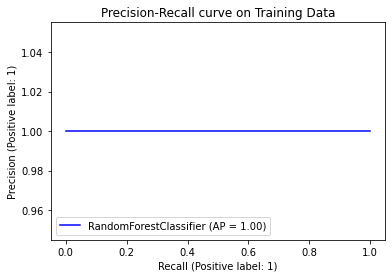

In [75]:
rf_plot = plot_precision_recall_curve(rfc_model, X_train, y_train, color = "blue")
rf_plot.ax_.set_title('Precision-Recall curve on Training Data')

Random Forest has Precision-Recall of 1.00, which is the best because all the positive samples are classified as positive and negative samples classified as negative 

Text(0.5, 1.0, 'Precision-Recall curve on Training Data')

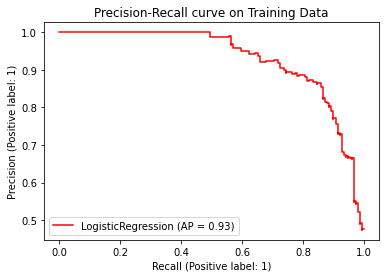

In [76]:
lr_plot = plot_precision_recall_curve(lr_model, X_train, y_train, color = "red")
lr_plot.ax_.set_title('Precision-Recall curve on Training Data')

The curve started to decrease when recall is more than 0.4 which means after 0.4, the model’s precision decreases. This means that the model returns more false positive results. 

Evaluating other performance metrices for the models such as precision, recall, sensitivity, and specificity. 

In [77]:
#Logistic Regression
TP = lr_cm[1,1] ; TN = lr_cm[0,0] ;FP = lr_cm[0,1]; FN = lr_cm[1,0]
pr_lr= TP/(TP+FP) ; re_lr= ss_lr=TP/(FN+TP); (TP/ float(TP+FN)) ; sp_lr= (TN/ float(TN+FP))

#Random Forest
TP = rfc_cm[1,1]; TN = rfc_cm[0,0]; FP = rfc_cm[0,1]; FN = rfc_cm[1,0]
pr_rf= TP/(TP+FP) ; re_rf=TP/(FN+TP); ss_rf= (TP/ float(TP+FN)); sp_rf= (TN/ float(TN+FP))

#Performance_metrices
precision = [pr_lr,pr_rf]
recall = [re_lr,re_rf]
sensitivity =[ss_lr,ss_rf]
specificity =[sp_lr,sp_rf]

In [78]:
models=['Logistic Regression','Random Forest']
result_table = pd.DataFrame({'Models':models,'Precision':precision,'Recall':recall,
                             'Sensitivity':sensitivity,'Specificity':specificity})
result_table

,Models,Precision,Recall,Sensitivity,Specificity
0,Logistic Regression,0.877551,0.843137,0.843137,0.903226
1,Random Forest,1.000000,1.000000,1.000000,1.000000


Random Forest has the most perfect performance which is 1.0 for all the metrices. Logistic Regression has precision of 0.87, recall of 0.84, sensitivity of 0.84 and specificity of 0.90. Logistic regression model is considered good for this dataset, but Random Forest gives the best results with no errors and the most accurate model. 

# Model Testing

After creating the model, model is tested to see the predictions given with the actual result

In [79]:
X_train.head()

,sex,weight,p-r_interval,q-t_interval,p_interval,r_wave,AB,AE,AK,AN,...,JS,JT,KA,KD,KE,KG,KZ,LD,LF,diagnosis
223,1,55,186,358,113,40,0,0,0,0,...,0.0,0.0,-0.1,-6.8,0.0,1.0,13.1,0.8,24.0,1
305,0,59,141,340,87,44,0,0,0,0,...,0.0,0.0,1.9,-18.3,0.0,0.7,14.3,0.5,24.8,1
162,0,78,216,414,170,68,0,0,0,0,...,0.0,0.0,-0.4,-11.8,0.0,1.4,8.9,1.0,33.0,1
291,0,74,164,381,92,56,0,0,0,0,...,0.0,0.0,-1.0,-2.0,0.0,0.7,13.2,0.6,34.8,10
93,1,70,169,328,85,48,0,0,0,0,...,0.0,0.0,-0.8,-5.2,0.0,0.6,4.2,0.5,6.0,5


In [80]:
df4.target[93]

1

Getting a row from Xtrain to make predictions

In [81]:
X_train.loc[[93]]

,sex,weight,p-r_interval,q-t_interval,p_interval,r_wave,AB,AE,AK,AN,...,JS,JT,KA,KD,KE,KG,KZ,LD,LF,diagnosis
93,1,70,169,328,85,48,0,0,0,0,...,0.0,0.0,-0.8,-5.2,0.0,0.6,4.2,0.5,6.0,5


In [82]:
X1=X_train.loc[[93]]
#X1 = X1.reshape(1,-1)
print('Predicted:%d, Actual:%d'%(rfc_model.predict(X1), df4.target[93]))

Predicted:1, Actual:1


In [83]:
X2=X_train.loc[[93]]
#X1 = X1.reshape(1,-1)
print('Predicted:%d, Actual:%d'%(lr_model.predict(X2), df4.target[93]))

Predicted:0, Actual:1


From the output, it shows that Random Forest gives accurate prediction which is 1 while Logistic Regression gives 0. For normal it will be 0 while 1 is for risky. In this testing, Logistic Regression gave false negative which it predicted normal, but the actual result is risky. 

# Discussions

Two models were built to classify patients with normal arrhythmia and risky type arrhythmia. Random Forest achieved the best accuracy of 1.0 in which it predicts all cases correctly with no errors. It also gives a score of 1.0 for precision, recall, sensitivity, and specificity. This model can be used to solve issues of patients that are at high risk and need immediate treatment. Without this solution, it will be hard to predict patients with different types of arrhythmias. This is because risky types of arrhythmias can cause other underlying health conditions, like strokes and sudden death. Therefore, the solution provided classifies class 1 to Normal type while class 2-16 as risky type. Another model, which is Logistic Regression model, gives an accuracy of 0.867. The model predicted 6 patients with Normal arrhythmia as risky while 8 risky patients as Normal arrhythmia. These wrong predictions should be taken seriously as it involves person’s life. Therefore, from the implementation, Random Forest is the best model because it does not give any false positives or false negatives. Random Forest model is further tested with the dataset to see if it gives correct predictions. One row from the training dataset is chosen for testing and Random Forest gave correct prediction with the actual target value. There are no further improvements needed in the Random Forest model, but improvements can be done on the Logistic Regression model to improve its accuracy. Based on a research paper on “Detection of common risk factors for diagnosis of cardiac arrhythmia”, they used hyper-parameter tuning to find the right parameters for the models. So, the hyper-parameter tuning can be recommended for Logistic Regression model. Grid Search and cross-validation can be used to find the optimal parameters for the model. 

# Conclusion

In conclusion, two models were built to classify patients with normal and risky types of arrhythmia, with Random Forest achieving the best accuracy of 1.0 and perfect scores for precision, recall, sensitivity, and specificity. This model can be used to identify patients at high risk who require immediate treatment, and its implementation can greatly improve the ability to predict different types of arrhythmias. The Logistic Regression model also performed well, achieving an accuracy of 0.867, but had some false positive and false negative predictions that should be taken seriously. The Random Forest model did not have any errors when tested with the dataset, and no further improvements were deemed necessary. However, the Logistic Regression model could be further improved by using hyper-parameter tuning through techniques such as Grid Search and cross-validation to find optimal parameters for the model. Overall, the implementation of these models can greatly aid in identifying and treating arrhythmia in patients, potentially improving their long-term health outcomes.

# References

1.	Beckerman, J., 2020. Heart Disease and Sudden Cardiac Death. [online] WebMD. Available at: <https://www.webmd.com/heart-disease/guide/sudden-cardiac-
death#:~:text=Sudden%20cardiac%20death%20(SCD)%20is,in%20the%20U.S.%20each%2 0year.> [Accessed 9 May 2022].
2.	Mayo Clinic. 2022. Heart arrhythmia - Symptoms and causes. [online] Available at: <https://www.mayoclinic.org/diseases-conditions/heart-arrhythmia/symptoms-causes/syc-20350668> [Accessed 9 May 2022].
3.	S.S.Yadav, and  S.M.Jadhav, S., 2020. Detection ofcommon risk factors for diagnosis ofcardiac arrhythmia using machine learning algorithm. [ebook] Elsevier Ltd, pp.1-13. Available at: <https://linkinghub.elsevier.com/retrieve/pii/S0957417420306229> [Accessed 15 May 2022].
4.	Singh, N. and Singh, P., 2019. Cardiac Arrhythmia Classification Using Machine Learning Techniques. [ebook] Springer Nature Singapore Pte Ltd, pp.469-479. Available at: <https://doi.org/10.1007/978-981-13-1642-5_42> [Accessed 15 May 2022].
5.	Mohammad, R., Abdullah, M. and Rawashdeh, J., 2020. Machine Learning with Oversampling and Undersampling Techniques: Overview Study and Experimental Results.[online] Ieeexplore.ieee.org. Available at:
<https://ieeexplore.ieee.org/abstract/document/9078901> [Accessed 21 May 2022].
6.	Stanfordhealthcare.org. 2021. Treatment for Arrhythmia. [online] Available at:
<https://stanfordhealthcare.org/medical-conditions/blood-heart-
circulation/arrhythmia/types.html> [Accessed 21 May 2022].